# Part II - Effect of loan variables on loan status
## by Okechukwu Victory

## Investigation Overview
In my investigation i wanted to access the loan variables that affect the loan status, after my assesment of the various variables, i ended up focusing on two variables, the borrowers rate and the loan term.

In my presentation i focus on the effect of borrowers rate and loan term categories on the the main variable loan status to determine the causes of missing payments. I start by introducing the counts for the categories of loan status variable, because the data was highly skewed a logarithm transform was used. Followed by a plot of thehistogram distribution of the borrowers rate variable.

Then a lineplot was introduced to show the counts of the various loan status categories across the various loan term categories. lastly a boxplot for the borrowers rate of the different categories was plotted across different loan term categories. a color palette was used to differentiate the various loan status categories. 

## Dataset Overview

The prosper loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# Making a list of the columns needed
loan_cols = ['Term', 'LoanStatus','BorrowerRate',
             'BorrowerState','EmploymentStatus',
             'IsBorrowerHomeowner','StatedMonthlyIncome',
             'MonthlyLoanPayment','CreditScoreRangeLower',
             'LoanOriginalAmount','LoanCurrentDaysDelinquent',
             'EmploymentStatusDuration','AvailableBankcardCredit']
# Dropping the columns not needed
df = loans.drop(loans.columns.difference(loan_cols),axis=1)

In [4]:
# Making a list of the categories in the loan status variable
loanstatus_classes = ['Completed', 'Current','FinalPaymentInProgress', 'Past Due (1-15 days)',
                      'Past Due (16-30 days)','Past Due (61-90 days)', 'Past Due (31-60 days)',
                      'Past Due (91-120 days)','Past Due (>120 days)', 'Cancelled','Defaulted','Chargedoff']

ls_classes = pd.api.types.CategoricalDtype(loanstatus_classes,True)

df['LoanStatus'] =df['LoanStatus'].astype(ls_classes)

## Loan status categories count
Taking a look at the loan status variable, the loans in the current category has the highest counts followed by the completed. plotting the count on a logarithimic scale it shows that the past due days have the lowest counts

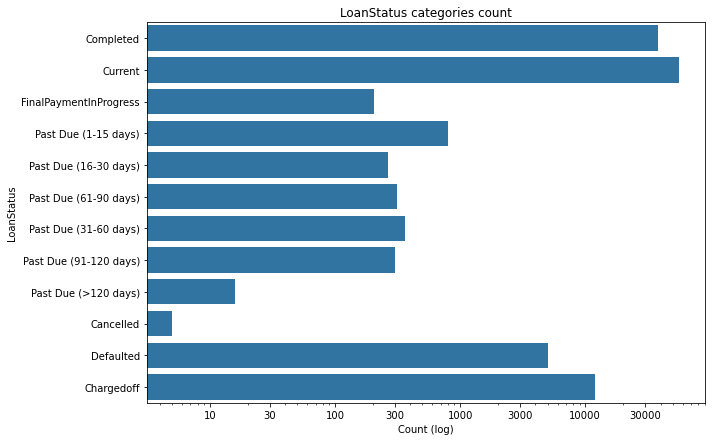

In [12]:
# Barchart of the log count of different categories
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,7])
sb.countplot(data=df,y='LoanStatus',color=base_color)
plt.xscale('log')
ticks = [10,30,100,300,1000,3000,10000,30000]
plt.xticks(ticks,ticks)
plt.title('LoanStatus categories count')
plt.xlabel('Count (log)');

## Borrower's rate distribution

The borrower rates are very few ranging from 0 to about 0.5, peaking at about 0.15

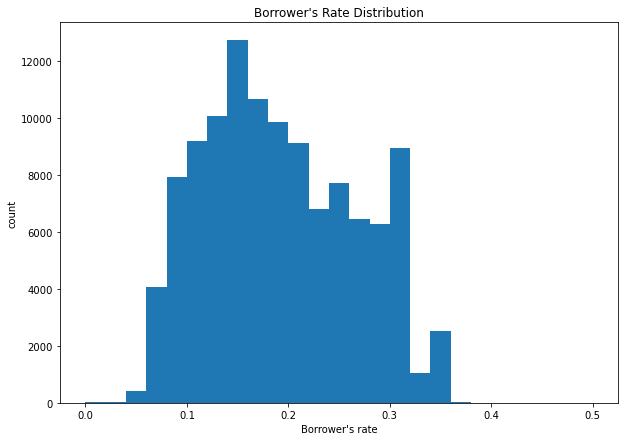

In [23]:
# Histogram of Borrower's rate variable
plt.figure(figsize=[10,7])
bins = np.arange(0,0.5+0.02,0.02)
plt.hist(data=df,x='BorrowerRate',bins=bins)
plt.xlabel("Borrower's rate")
plt.ylabel('count')
plt.title("Borrower's Rate Distribution");

## Loan status vs loan term

This shows there is a similar trend for the different terms, across the various loan status categories with the 36 months term having the highest counts and 12 months term having the lowest counts. There is a general decrease in the number of borrowers across the loan status categories followed by a spike increase in defaulted and charged off loans

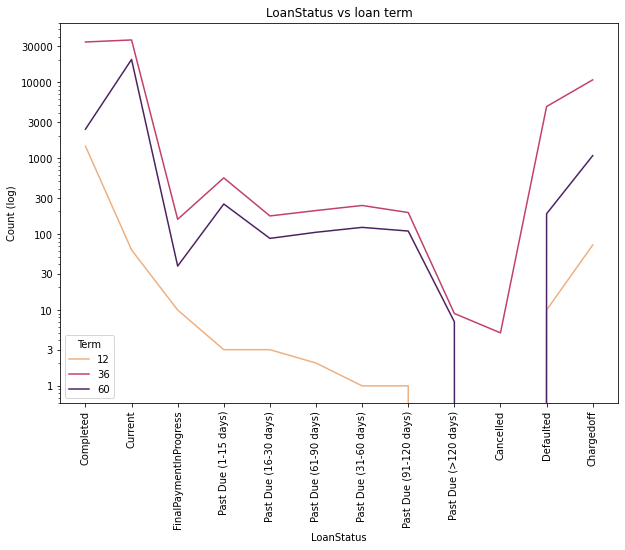

In [15]:
# Creating a sub-dataset for lineplot
df_line = df.groupby(['LoanStatus','Term']).size().reset_index(name='count')
# Lineplot of loan status ad loan term
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,7])
sb.lineplot(data=df_line,x='LoanStatus',y='count',hue='Term',palette='flare')
plt.yscale('log')
ticks= [1,3,10,30,100,300,1000,3000,10000,30000]
plt.yticks(ticks,ticks)
plt.ylabel('Count (log)')
plt.title('LoanStatus vs loan term')
plt.xticks(rotation=90);

## Loan status vs Borrower's rate
The higher the rates the more likely it is to have missing payments or deliquency of loans.

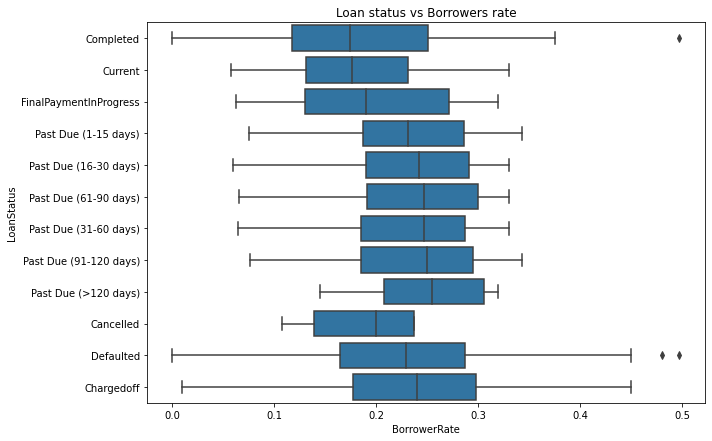

In [20]:
plt.figure(figsize=[10,7])
sb.boxplot(data=df,y='LoanStatus',x='BorrowerRate',color=base_color)
plt.title('Loan status vs Borrowers rate');

## Loan status vs borrower's rate across loan terms
The effect of borrower's rate is more evident when looking at the different loan term categories. This shows clearly in the 36 months term that with higher borrower rate the days of deliquency increases but defaulted or charged off loans are lower. while in the longer term category which is the 60 months term that the defaulted and charged off loans have the highest borrowers rate. It also shows that the borrowers working full time in the 36 months term have the highest defaulted and charged off loans

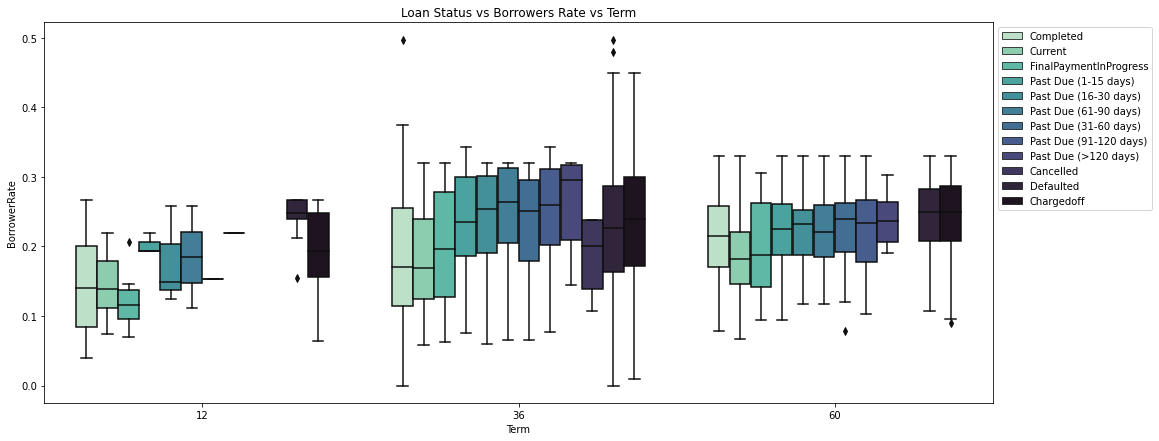

In [10]:
plt.figure(figsize=[17,7])
sb.boxplot(data=df, x='Term', y='BorrowerRate',color=base_color,hue='LoanStatus',palette='mako_r')
plt.title('Loan Status vs Borrowers Rate vs Term')
plt.legend(bbox_to_anchor=(1,1));